# PyTorch software benchmark analysis

Single node throughput comparisons between installation versions

In [1]:
import os
import re
import glob

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
plt.rcParams.update({'font.size': 14})

## Load the results

In [4]:
ls /global/cscratch1/sd/sfarrell/pytorch-benchmarks/results

gpu-v1.2.0-nccl-n1/       gpu-v1.4.0.ngc-nccl-n4/   hsw-v1.4.0-mpi-n8/
gpu-v1.3.1-nccl-n1/       gpu-v1.4.0.ngc-nccl-n64/  knl-v1.2.0-mpi-n1/
gpu-v1.3.1-nccl-n16/      gpu-v1.4.0.ngc-nccl-n8/   knl-v1.3.1-mpi-n1/
gpu-v1.3.1-nccl-n2/       hsw-v1.2.0-mpi-n1/        knl-v1.3.1-mpi-n16/
gpu-v1.3.1-nccl-n32/      hsw-v1.3.1-mpi-n1/        knl-v1.3.1-mpi-n2/
gpu-v1.3.1-nccl-n4/       hsw-v1.3.1-mpi-n16/       knl-v1.3.1-mpi-n32/
gpu-v1.3.1-nccl-n64/      hsw-v1.3.1-mpi-n2/        knl-v1.3.1-mpi-n4/
gpu-v1.3.1-nccl-n8/       hsw-v1.3.1-mpi-n32/       knl-v1.3.1-mpi-n64/
gpu-v1.4.0-nccl-n1/       hsw-v1.3.1-mpi-n4/        knl-v1.3.1-mpi-n8/
gpu-v1.4.0-nccl-n16/      hsw-v1.3.1-mpi-n64/       knl-v1.4.0-mpi-n1/
gpu-v1.4.0-nccl-n2/       hsw-v1.3.1-mpi-n8/        knl-v1.4.0-mpi-n16/
gpu-v1.4.0-nccl-n4/       hsw-v1.4.0-mpi-n1/        knl-v1.4.0-mpi-n2/
gpu-v1.4.0-nccl-n8/       hsw-v1.4.0-mpi-n16/       knl-v1.4.0-mpi-n32/
gpu-v1.4.0.ngc-nccl-n1/   hsw-v1.4.0-mpi-n2/        knl-v1.4.0-mpi-n4/
g

In [10]:
results_files = glob.glob('/global/cscratch1/sd/sfarrell/pytorch-benchmarks/results/hsw-*-n1/results.txt')

results_files

['/global/cscratch1/sd/sfarrell/pytorch-benchmarks/results/hsw-v1.4.0-mpi-n1/results.txt',
 '/global/cscratch1/sd/sfarrell/pytorch-benchmarks/results/hsw-v1.3.1-mpi-n1/results.txt',
 '/global/cscratch1/sd/sfarrell/pytorch-benchmarks/results/hsw-v1.2.0-mpi-n1/results.txt']

In [11]:
results = [pd.read_csv(f, delim_whitespace=True) for f in results_files]
results = pd.concat(results, ignore_index=True)

results

,train_rate,inference_rate,ranks,hardware,version,backend,model
0,13.569031,46.667993,1,hsw,v1.4.0,mpi,inceptionV3
1,517.521541,1511.682512,1,hsw,v1.4.0,mpi,lstm
2,195.029870,598.416267,1,hsw,v1.4.0,mpi,alexnet
3,14.540763,42.258158,1,hsw,v1.4.0,mpi,resnet50
4,19.855161,61.477883,1,hsw,v1.4.0,mpi,vgg11
5,85.189401,162.950070,1,hsw,v1.4.0,mpi,cnn3d
6,13.529519,47.272146,1,hsw,v1.3.1,mpi,inceptionV3
7,357.923054,785.279341,1,hsw,v1.3.1,mpi,lstm
8,196.894968,604.887613,1,hsw,v1.3.1,mpi,alexnet
9,14.631284,54.826791,1,hsw,v1.3.1,mpi,resnet50


## Training throughput comparisons

In [12]:
models = results.model.unique()

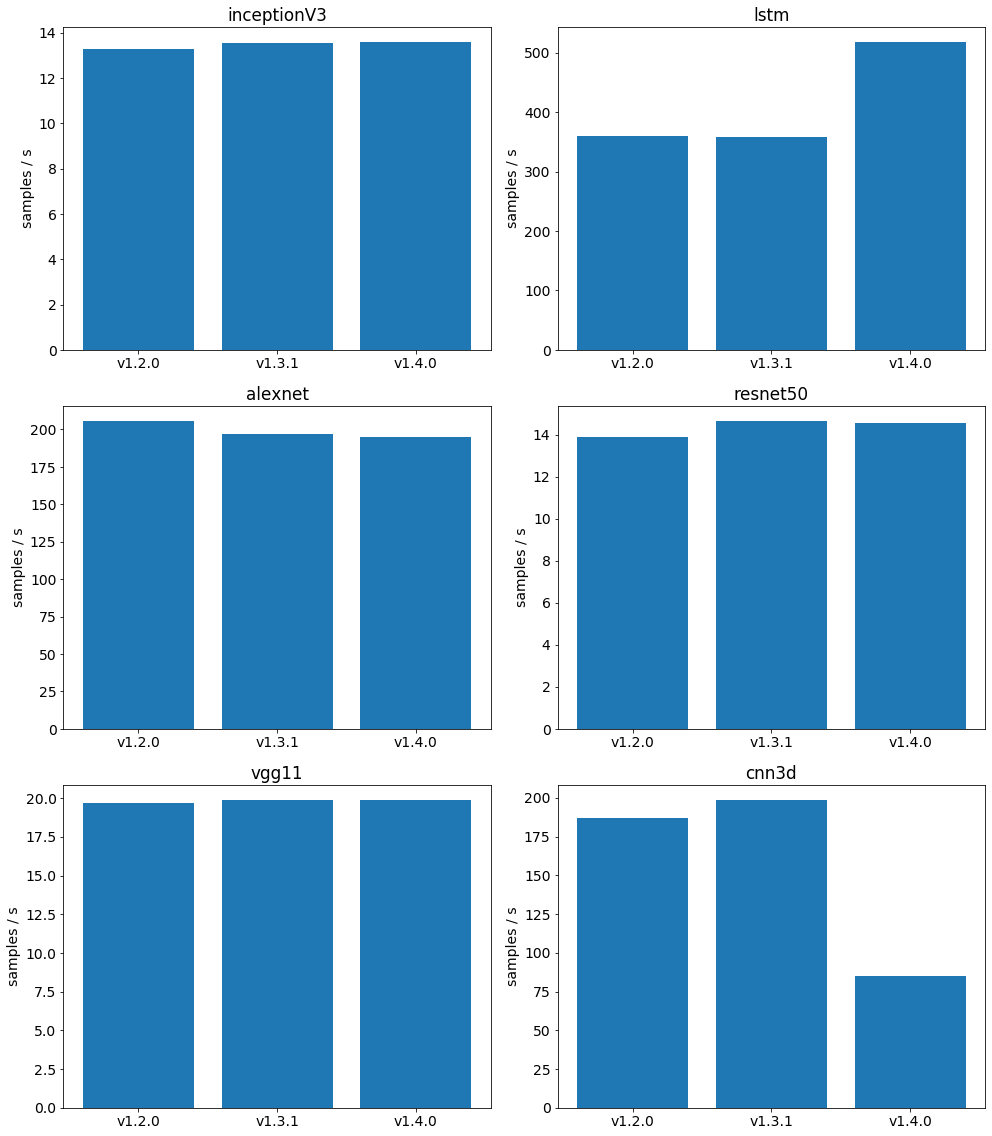

In [13]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(14, 16))
axs = axs.flatten()

for i, model in enumerate(models):
    ax = axs[i]
    model_results = results[results.model == model].sort_values('version')
    ax.bar(model_results.version, model_results.train_rate)
    ax.set_title(model)
    ax.set_ylabel('samples / s')

plt.tight_layout()

## Inference throughput comparisons

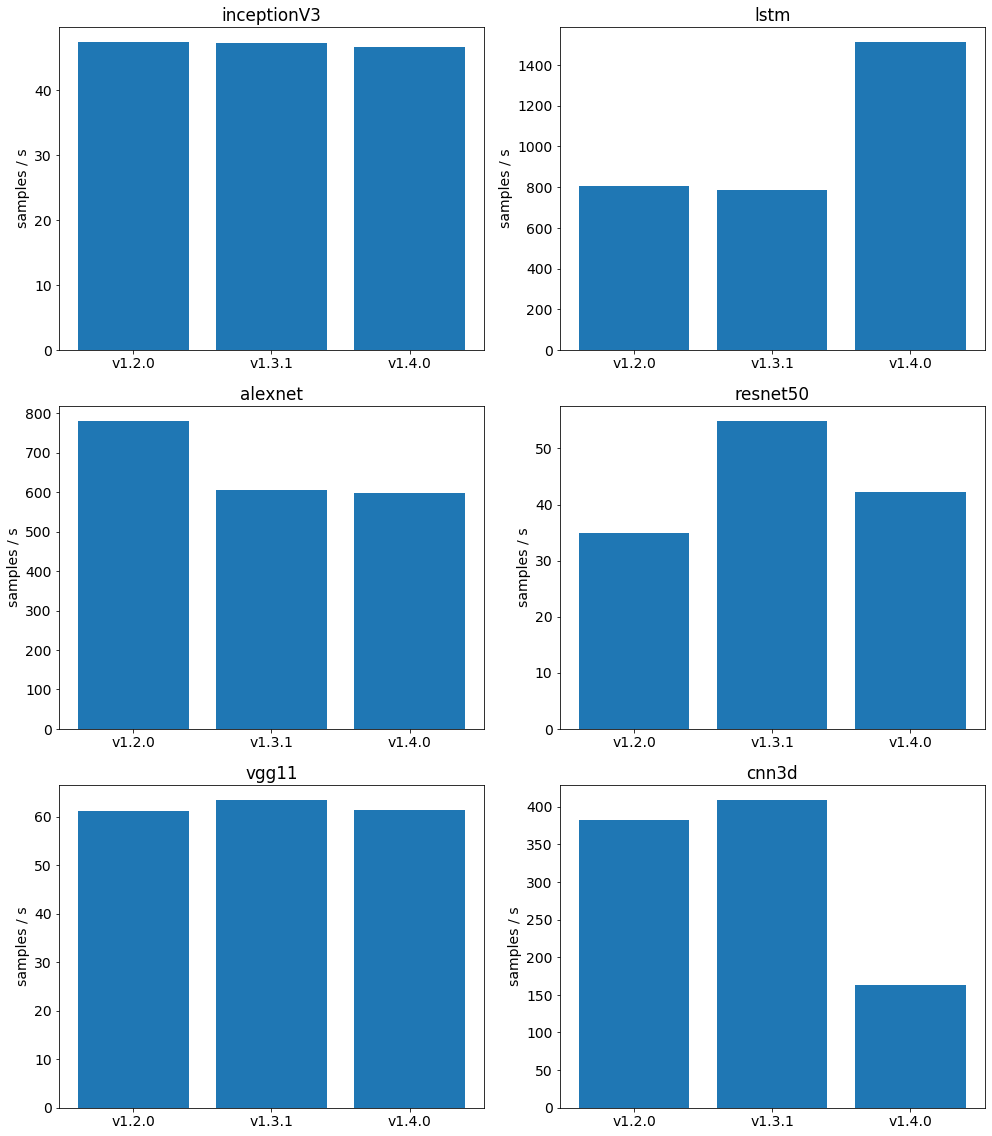

In [14]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(14, 16))
axs = axs.flatten()

for i, model in enumerate(models):
    ax = axs[i]
    model_results = results[results.model == model].sort_values('version')
    ax.bar(model_results.version, model_results.inference_rate)
    ax.set_title(model)
    ax.set_ylabel('samples / s')

plt.tight_layout()